In [1]:
import umap
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

2024-01-19 22:35:46.592307: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 22:35:46.637650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 22:35:46.637684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 22:35:46.638914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 22:35:46.645933: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 22:35:46.646657: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Read and parse the gene sequence data based on the provided genes

In [2]:
dataset = pd.read_csv("geneExpFinal.csv")
#assigned_gene_indices = dataset[dataset['feature'].isin(genes)].index
dataset.set_index('feature', inplace=True)
dataset

,1,2,3,4,5,6,7,8,9,10,...,188,189,190,191,192,193,194,195,196,197
feature,,,,,,,,,,,,,,,,,,,,,
Aaas,0.555882,2.483721,1.533441,1.246233,2.678350,1.701889,1.520495,0.973046,1.427339,1.919440,...,4.389950,1.526683,1.613862,2.167718,0.085656,4.168750,2.345556,4.130000,0.893730,4.367313
Aacs,0.983529,1.531163,2.784624,1.121575,5.805781,2.624530,1.639208,0.976118,1.512936,4.373320,...,5.490609,2.368191,4.364509,5.285410,0.904198,4.849062,2.431389,4.478333,0.709807,5.020588
Aaed1,1.681765,1.268837,1.935806,1.797808,1.149175,1.255805,2.184757,1.984437,1.272569,1.231440,...,1.017322,1.449246,1.396892,0.852935,0.613411,0.904375,1.362778,1.269861,0.978622,1.844950
Aagab,2.038824,5.548387,2.753979,2.924189,5.775625,5.635535,5.142174,2.282185,2.126422,5.854722,...,5.618434,5.439773,5.697768,6.002951,2.131283,5.517188,5.510416,5.903333,3.010447,5.278060
Aak1,7.303478,7.097857,7.243175,7.149293,6.994091,7.291365,7.278806,6.848600,7.576111,7.209801,...,7.211005,6.987744,7.500031,7.283115,7.468246,7.866562,6.996250,7.204375,7.228840,7.449706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc,0.343824,0.687209,1.199785,0.913493,2.044082,1.823676,1.185050,0.764901,0.433028,1.775867,...,3.754619,0.901156,1.275153,1.553587,0.201691,2.086250,1.191111,1.970278,0.858649,1.591089
Zyg11b,5.651364,6.036071,6.114677,6.420000,6.044219,6.179018,6.508676,6.062970,6.117083,6.014382,...,6.205742,5.845789,6.254893,6.318852,5.487522,6.664688,5.898400,6.679792,6.038894,6.406269
Zyx,2.191765,1.749535,6.063387,2.627432,4.223750,4.618717,5.478060,2.362119,5.485972,2.069734,...,5.519596,1.513383,4.947890,2.253696,1.337318,4.489687,4.298800,2.045417,1.090225,6.052319


In [3]:
genes = ['Acads', 'Dusp28', 'Emx1', 'Vip', 'Urah']

In [4]:
df = dataset.loc[genes].T
df

feature,Acads,Dusp28,Emx1,Vip,Urah
1,0.018529,5.065000,0.000000,0.000000,0.000000
2,0.000000,4.336786,0.068140,0.000000,0.046977
3,0.000000,5.444193,0.000000,0.174409,0.000000
4,0.000000,5.559794,0.000000,0.000000,0.000000
5,0.000000,4.053906,1.176701,0.000000,0.000000
...,...,...,...,...,...
193,0.000000,4.310937,4.101562,0.000000,0.000000
194,0.000000,4.444167,0.381667,0.024167,0.000000
195,0.000000,4.245417,0.773889,0.000000,0.364028
196,0.000000,1.722412,3.546555,0.000000,0.000000


## Clustering on All Genes

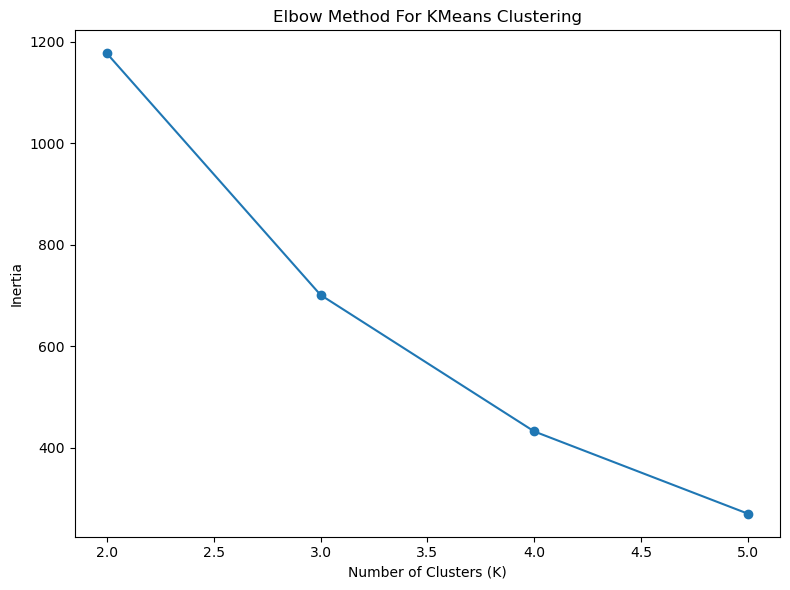

In [5]:
# Create figure
plt.figure(figsize=(8, 6))

values_of_K = range(2, 6)
scores = []
# Loop through K values
for k in values_of_K:
    # Fit the model
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = model.fit_predict(df)

    # Calculate fitness statistic
    score = model.inertia_
    scores.append(score)

# Plot the results
plt.plot(values_of_K, scores, marker='o')
plt.title(f'Elbow Method For KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.savefig("Elbow method for all genes.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()


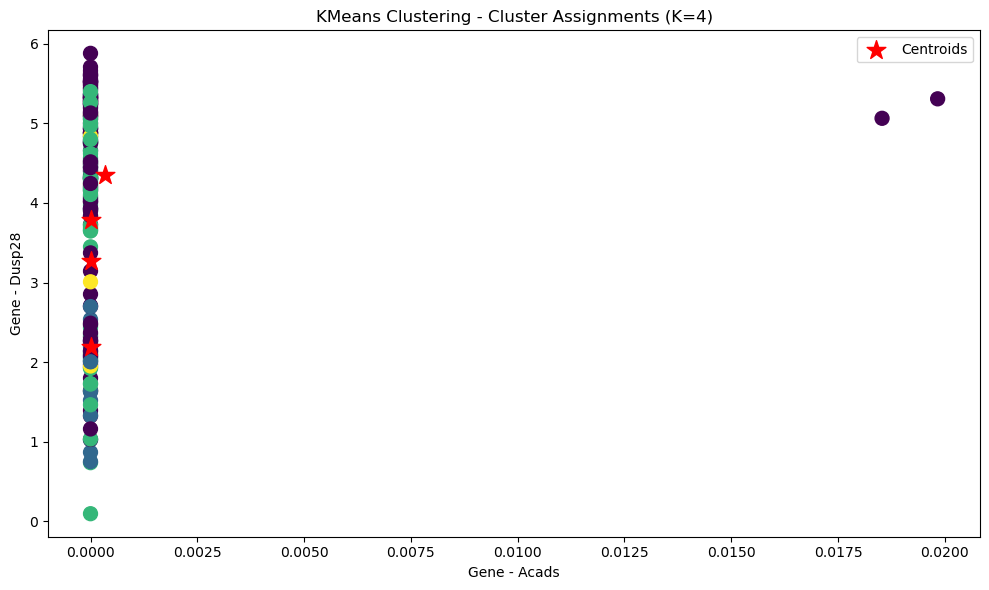

In [6]:
# Fit the KMeans model
n_clusters = 4
model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels = model.fit_predict(df)
centroids = model.cluster_centers_

# Visualize cluster assignments and centroids
plt.figure(figsize=(10, 6))

# Scatter plot for the original data points
plt.scatter(x=df.iloc[:, 0], y=df.iloc[:, 1], c=labels, cmap='viridis', s=100)
plt.title(f'KMeans Clustering - Cluster Assignments (K={n_clusters})')
plt.xlabel('Gene - Acads')
plt.ylabel('Gene - Dusp28')
# Scatter plot for the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.legend()
plt.savefig("Clustering for all genes.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()

## Clustering for Dimensionality Reduced Data

/home/ikraminf/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_26727/3147914207.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', alpha=0.5)
/tmp/ipykernel_26727/3147914207.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.5)
/tmp/ipykernel_26727/3147914207.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[2].scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', alpha=0.5)


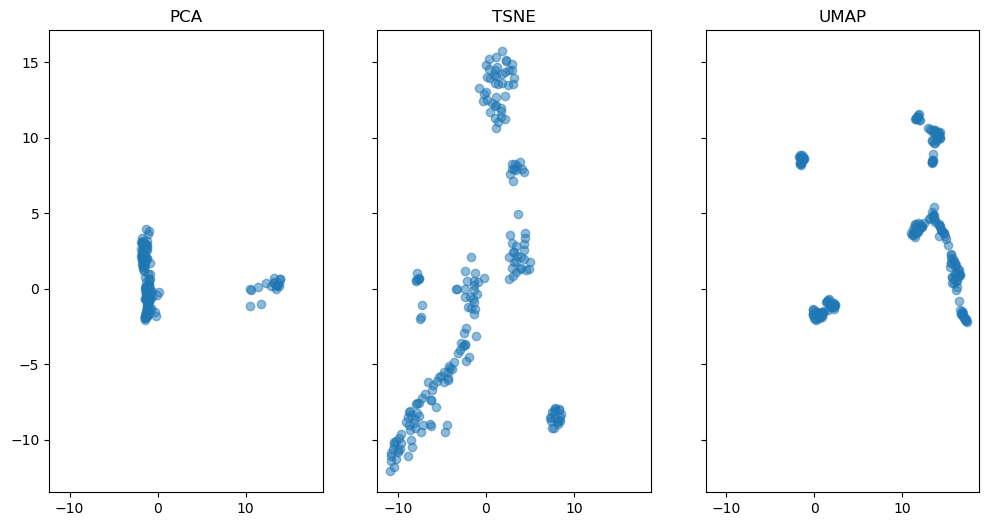

In [7]:
# Perform PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

# Perform UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

# Visualize clustering based on all 5 genes
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', alpha=0.5)
axes[0].set_title('PCA')

# Visualize clustering using reduced dimensions
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.5)
axes[1].set_title('TSNE')

# Visualize clustering using reduced dimensions
axes[2].scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', alpha=0.5)
axes[2].set_title('UMAP')

plt.savefig("Dimensionality reduction of 5 genes using pca tsne and umap.png", dpi=300, format="PNG")
plt.show()


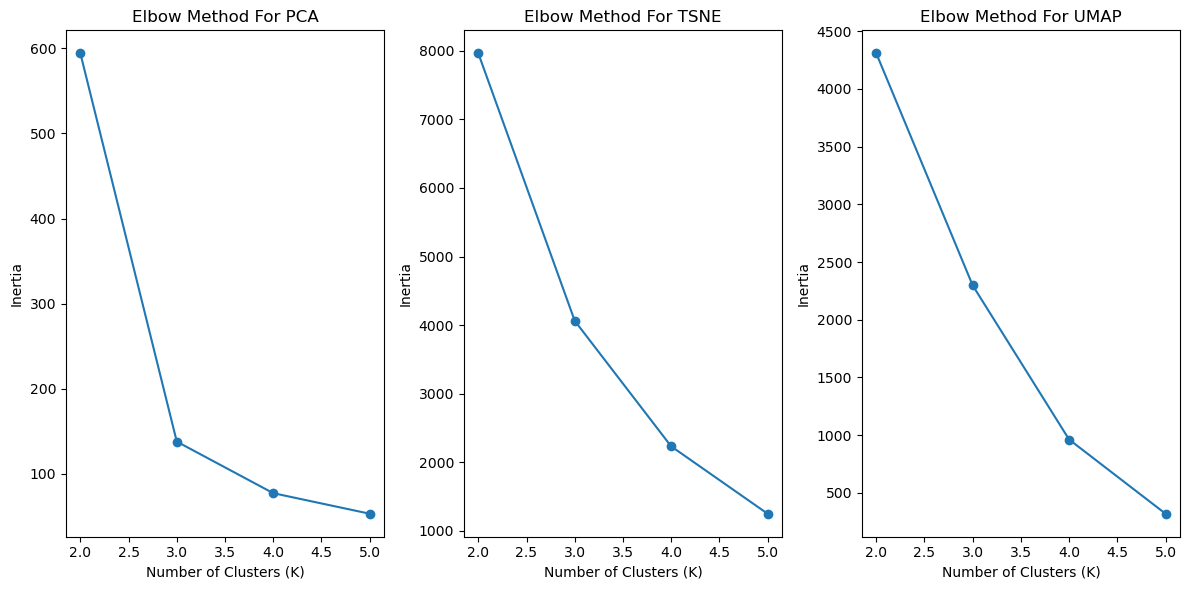

In [8]:
values_of_K = range(2, 6)
dr_results = [pca_result, tsne_result, umap_result]
dr_methods = ['PCA', 'TSNE', 'UMAP']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

for i, result in enumerate(dr_results):
    scores = []
    # Loop through K values
    for k in values_of_K:
        # Fit the model
        model = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = model.fit_predict(result)

        # Calculate fitness statistic
        score = model.inertia_
        scores.append(score)

    # Plot the results
    axs[i].plot(values_of_K, scores, marker='o')
    axs[i].set_title(f'Elbow Method For {dr_methods[i]}')
    axs[i].set_xlabel('Number of Clusters (K)')
    axs[i].set_ylabel('Inertia')

plt.savefig("Elbow method for reduced genes from 5.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()


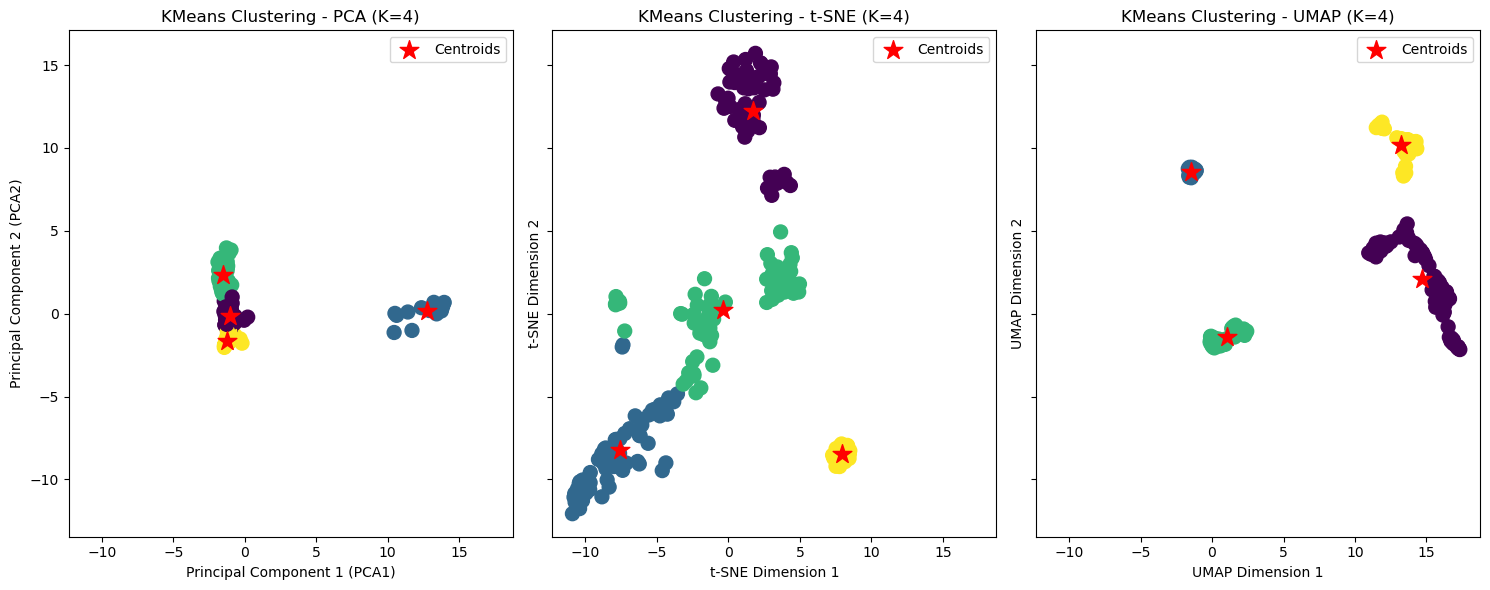

In [9]:
# Fit the AgglomerativeClustering model
n_clusters = 4
model_pca = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels = model_pca.fit_predict(pca_result)
centroids_pca = model_pca.cluster_centers_

# Perform KMeans clustering on t-SNE result
model_tsne = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_tsne = model_tsne.fit_predict(tsne_result)
centroids_tsne = model_tsne.cluster_centers_

# Perform KMeans clustering on UMAP result
model_umap = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_umap = model_umap.fit_predict(umap_result)
centroids_umap = model_umap.cluster_centers_

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

# Visualize cluster assignments for PCA result
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=100)
axs[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[0].set_title(f'KMeans Clustering - PCA (K={n_clusters})')
axs[0].set_xlabel('Principal Component 1 (PCA1)')
axs[0].set_ylabel('Principal Component 2 (PCA2)')
axs[0].legend()

# Visualize cluster assignments for t-SNE result
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_tsne, cmap='viridis', s=100)
axs[1].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[1].set_title(f'KMeans Clustering - t-SNE (K={n_clusters})')
axs[1].set_xlabel('t-SNE Dimension 1')
axs[1].set_ylabel('t-SNE Dimension 2')
axs[1].legend()

# Visualize cluster assignments for UMAP result
axs[2].scatter(umap_result[:, 0], umap_result[:, 1], c=labels_umap, cmap='viridis', s=100)
axs[2].scatter(centroids_umap[:, 0], centroids_umap[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[2].set_title(f'KMeans Clustering - UMAP (K={n_clusters})')
axs[2].set_xlabel('UMAP Dimension 1')
axs[2].set_ylabel('UMAP Dimension 2')
axs[2].legend()

plt.savefig("Clustering for reduced genes from 5.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()

### Bonus

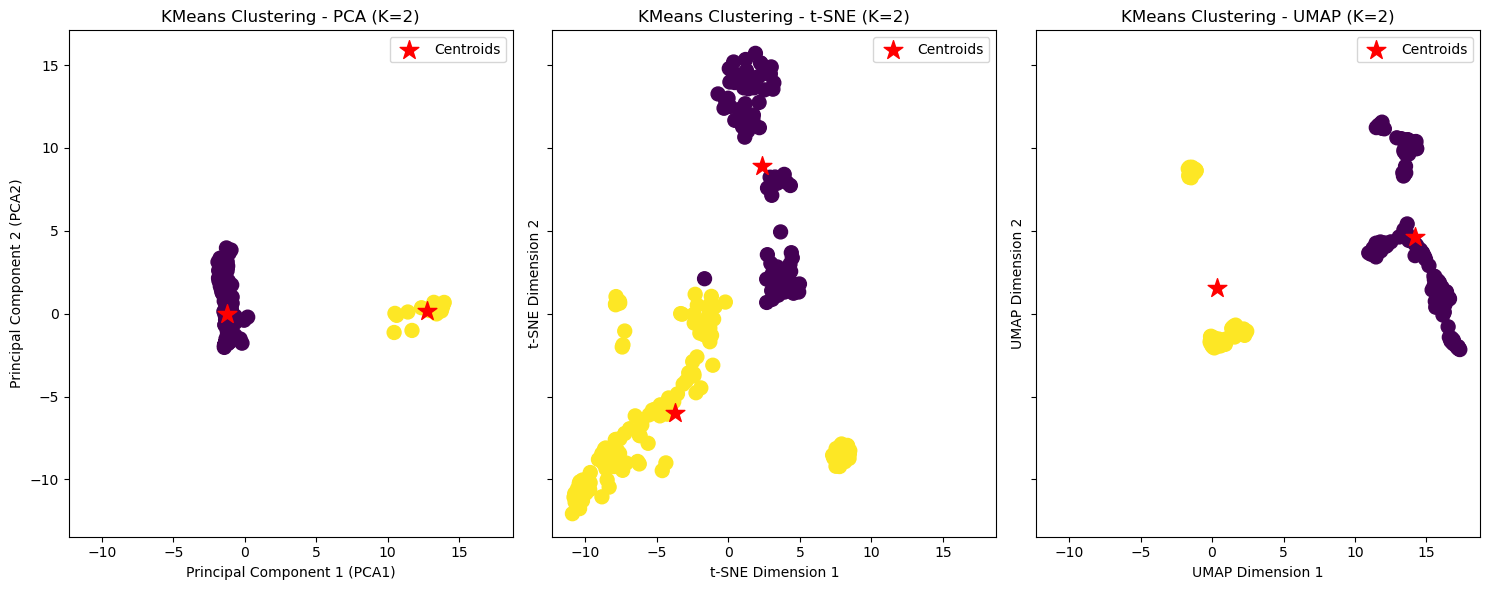

In [10]:
# Fit the AgglomerativeClustering model
n_clusters = 2
model_pca = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels = model_pca.fit_predict(pca_result)
centroids_pca = model_pca.cluster_centers_

# Perform KMeans clustering on t-SNE result
model_tsne = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_tsne = model_tsne.fit_predict(tsne_result)
centroids_tsne = model_tsne.cluster_centers_

# Perform KMeans clustering on UMAP result
model_umap = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_umap = model_umap.fit_predict(umap_result)
centroids_umap = model_umap.cluster_centers_

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

# Visualize cluster assignments for PCA result
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=100)
axs[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[0].set_title(f'KMeans Clustering - PCA (K={n_clusters})')
axs[0].set_xlabel('Principal Component 1 (PCA1)')
axs[0].set_ylabel('Principal Component 2 (PCA2)')
axs[0].legend()

# Visualize cluster assignments for t-SNE result
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_tsne, cmap='viridis', s=100)
axs[1].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[1].set_title(f'KMeans Clustering - t-SNE (K={n_clusters})')
axs[1].set_xlabel('t-SNE Dimension 1')
axs[1].set_ylabel('t-SNE Dimension 2')
axs[1].legend()

# Visualize cluster assignments for UMAP result
axs[2].scatter(umap_result[:, 0], umap_result[:, 1], c=labels_umap, cmap='viridis', s=100)
axs[2].scatter(centroids_umap[:, 0], centroids_umap[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[2].set_title(f'KMeans Clustering - UMAP (K={n_clusters})')
axs[2].set_xlabel('UMAP Dimension 1')
axs[2].set_ylabel('UMAP Dimension 2')
axs[2].legend()

plt.savefig("Clustering for K=2 for reduced genes.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()

## Clustering for Top 3 Genes

In [11]:
# Calculate the Pearson correlation coefficient for each pair of genes
gene_corr = np.corrcoef(dataset, rowvar=True)

/home/ikraminf/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ikraminf/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [12]:
corr_df = pd.DataFrame(gene_corr, index=dataset.index, columns=dataset.index)
corr_df

feature,Aaas,Aacs,Aaed1,Aagab,Aak1,Aamdc,Aamp,Aar2,Aard,Aars,...,Zufsp,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3
feature,,,,,,,,,,,,,,,,,,,,,
Aaas,1.000000,0.674930,0.141933,0.618646,0.074669,0.320799,0.007357,0.721880,0.128561,-0.003779,...,0.521617,0.709395,0.397454,-0.137366,0.629755,0.734600,0.540183,0.322152,0.488255,0.528424
Aacs,0.674930,1.000000,0.026091,0.719609,-0.155225,0.244286,-0.118498,0.755553,0.164301,-0.082110,...,0.611105,0.581762,0.357892,-0.279731,0.452760,0.615931,0.438389,0.249566,0.544244,0.717033
Aaed1,0.141933,0.026091,1.000000,0.017296,0.116471,0.320711,0.351009,0.172541,0.078208,0.358214,...,0.256441,0.247987,-0.055710,0.213865,0.046585,0.110359,0.228764,0.188306,0.188180,-0.000591
Aagab,0.618646,0.719609,0.017296,1.000000,-0.023330,0.230977,-0.144104,0.785636,0.148617,-0.158819,...,0.613774,0.567066,0.215962,-0.365333,0.392385,0.662208,0.516433,0.379373,0.577859,0.800409
Aak1,0.074669,-0.155225,0.116471,-0.023330,1.000000,-0.117058,-0.024503,0.064407,0.003143,-0.015256,...,-0.158277,0.065610,-0.224060,0.242848,0.123019,0.143491,0.193999,0.096851,-0.073902,-0.089568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc,0.734600,0.615931,0.110359,0.662208,0.143491,0.116838,-0.212535,0.683359,0.033690,-0.017566,...,0.535247,0.744107,0.431769,-0.335429,0.592609,1.000000,0.515018,0.368186,0.562244,0.655491
Zyg11b,0.540183,0.438389,0.228764,0.516433,0.193999,0.474247,-0.169981,0.516229,0.077256,0.112561,...,0.530027,0.534831,0.254690,-0.155666,0.458419,0.515018,1.000000,0.430903,0.561568,0.493759
Zyx,0.322152,0.249566,0.188306,0.379373,0.096851,0.323164,-0.000314,0.310273,-0.037899,0.177945,...,0.409602,0.431993,0.141012,-0.187599,0.295195,0.368186,0.430903,1.000000,0.551335,0.350264


In [13]:
top_gene_indices = []
for gene in genes:
    top_3_closest_genes = corr_df[gene].abs().sort_values(ascending=False)[1:4].index.tolist()
    top_gene_indices.extend(top_3_closest_genes)

In [14]:
print(top_gene_indices)

['Nqo1', 'Cdh1', 'Ttn', 'Mospd3', 'G6pc3', 'B630019K06Rik', 'Ubtd2', 'Dusp7', 'Lrrc8c', 'Prox1', 'Sall1', 'Adarb2', 'Nts', 'Ikzf2', 'Slc23a2']


In [15]:
top_genes_df = dataset.loc[top_gene_indices].T
top_genes_df

feature,Nqo1,Cdh1,Ttn,Mospd3,G6pc3,B630019K06Rik,Ubtd2,Dusp7,Lrrc8c,Prox1,Sall1,Adarb2,Nts,Ikzf2,Slc23a2
1,0.0,0.000000,0.0,4.759131,4.952273,5.749091,0.097941,0.466765,0.528235,0.0,0.0,0.000000,2.590882,0.112059,6.899546
2,0.0,0.031163,0.0,3.757500,3.671429,3.792857,4.300357,3.140000,1.292093,0.0,0.0,0.186047,0.745349,0.000000,5.979643
3,0.0,0.000000,0.0,4.606935,5.065484,5.427258,1.433011,0.844516,1.268387,0.0,0.0,0.010851,0.000000,0.000000,6.790323
4,0.0,0.000000,0.0,4.949175,5.170714,5.880204,1.642329,0.525205,1.250616,0.0,0.0,0.000000,0.000000,0.620753,6.628144
5,0.0,0.000000,0.0,3.605692,4.677231,4.774063,5.323281,4.190156,1.988660,0.0,0.0,0.000000,0.000000,0.000000,6.902500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.111400,0.0,2.889687,4.278750,3.775938,5.744242,4.809062,5.122500,0.0,0.0,0.031458,0.000000,0.000000,7.404375
194,0.0,0.075278,0.0,3.748333,4.094583,4.060417,4.709583,3.741250,0.762222,0.0,0.0,0.000000,0.000000,0.000000,6.005833
195,0.0,0.000000,0.0,3.759184,4.707083,4.885833,3.916667,4.248750,4.296875,0.0,0.0,0.000000,0.000000,0.000000,6.813750
196,0.0,0.113376,0.0,1.537460,1.392500,1.614694,5.331353,4.298406,1.869391,0.0,0.0,0.000000,0.000000,0.000000,7.040962


In [16]:
top_genes_df = pd.concat([df, top_genes_df], axis=1)
top_genes_df

feature,Acads,Dusp28,Emx1,Vip,Urah,Nqo1,Cdh1,Ttn,Mospd3,G6pc3,B630019K06Rik,Ubtd2,Dusp7,Lrrc8c,Prox1,Sall1,Adarb2,Nts,Ikzf2,Slc23a2
1,0.018529,5.065000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,4.759131,4.952273,5.749091,0.097941,0.466765,0.528235,0.0,0.0,0.000000,2.590882,0.112059,6.899546
2,0.000000,4.336786,0.068140,0.000000,0.046977,0.0,0.031163,0.0,3.757500,3.671429,3.792857,4.300357,3.140000,1.292093,0.0,0.0,0.186047,0.745349,0.000000,5.979643
3,0.000000,5.444193,0.000000,0.174409,0.000000,0.0,0.000000,0.0,4.606935,5.065484,5.427258,1.433011,0.844516,1.268387,0.0,0.0,0.010851,0.000000,0.000000,6.790323
4,0.000000,5.559794,0.000000,0.000000,0.000000,0.0,0.000000,0.0,4.949175,5.170714,5.880204,1.642329,0.525205,1.250616,0.0,0.0,0.000000,0.000000,0.620753,6.628144
5,0.000000,4.053906,1.176701,0.000000,0.000000,0.0,0.000000,0.0,3.605692,4.677231,4.774063,5.323281,4.190156,1.988660,0.0,0.0,0.000000,0.000000,0.000000,6.902500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.000000,4.310937,4.101562,0.000000,0.000000,0.0,0.111400,0.0,2.889687,4.278750,3.775938,5.744242,4.809062,5.122500,0.0,0.0,0.031458,0.000000,0.000000,7.404375
194,0.000000,4.444167,0.381667,0.024167,0.000000,0.0,0.075278,0.0,3.748333,4.094583,4.060417,4.709583,3.741250,0.762222,0.0,0.0,0.000000,0.000000,0.000000,6.005833
195,0.000000,4.245417,0.773889,0.000000,0.364028,0.0,0.000000,0.0,3.759184,4.707083,4.885833,3.916667,4.248750,4.296875,0.0,0.0,0.000000,0.000000,0.000000,6.813750
196,0.000000,1.722412,3.546555,0.000000,0.000000,0.0,0.113376,0.0,1.537460,1.392500,1.614694,5.331353,4.298406,1.869391,0.0,0.0,0.000000,0.000000,0.000000,7.040962


/home/ikraminf/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_26727/3676444469.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', alpha=0.5)
/tmp/ipykernel_26727/3676444469.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.5)
/tmp/ipykernel_26727/3676444469.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[2].scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', alpha=0.5)


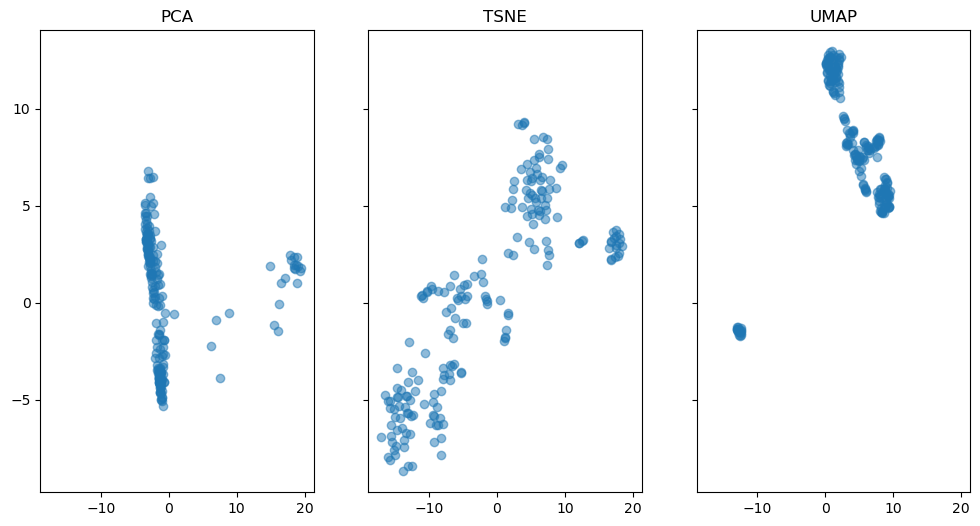

In [17]:
# Perform PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(top_genes_df)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(top_genes_df)

# Perform UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(top_genes_df)

fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

# Visualize clustering based on all 5 genes
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', alpha=0.5)
axes[0].set_title('PCA')

# Visualize clustering using reduced dimensions
axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis', alpha=0.5)
axes[1].set_title('TSNE')

# Visualize clustering using reduced dimensions
axes[2].scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', alpha=0.5)
axes[2].set_title('UMAP')

plt.savefig("Dimensionality reduction of 20 genes using pca tsne and umap.png", dpi=300, format="PNG")
plt.show()


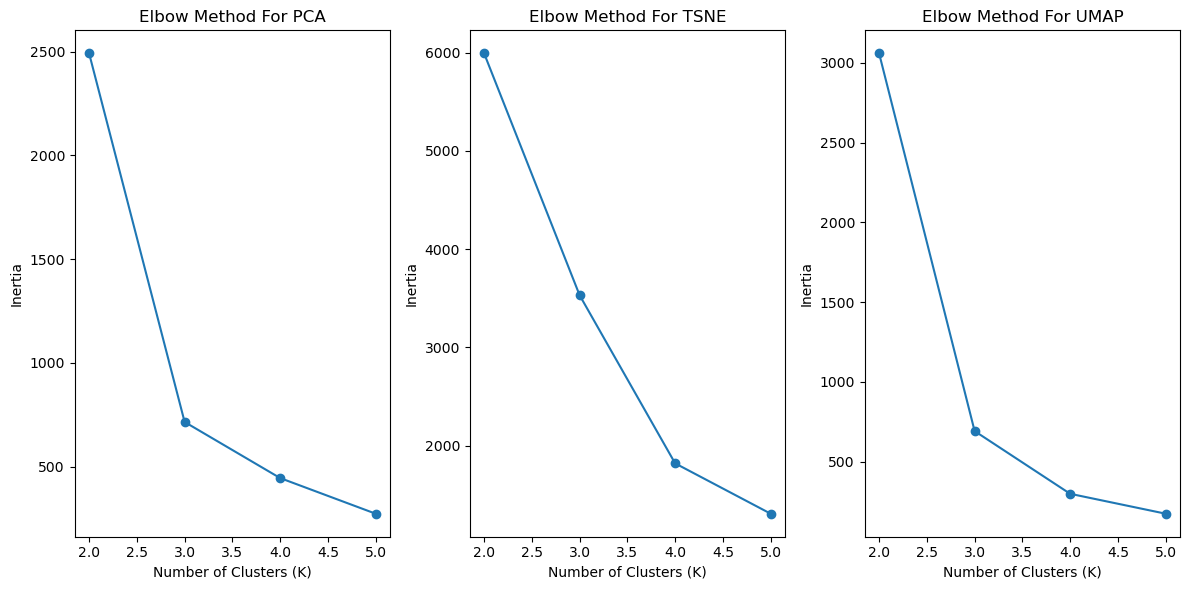

In [18]:
values_of_K = range(2, 6)
dr_results = [pca_result, tsne_result, umap_result]
dr_methods = ['PCA', 'TSNE', 'UMAP']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

for i, result in enumerate(dr_results):
    scores = []
    # Loop through K values
    for k in values_of_K:
        # Fit the model
        model = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = model.fit_predict(result)

        # Calculate fitness statistic
        score = model.inertia_
        scores.append(score)

    # Plot the results
    axs[i].plot(values_of_K, scores, marker='o')
    axs[i].set_title(f'Elbow Method For {dr_methods[i]}')
    axs[i].set_xlabel('Number of Clusters (K)')
    axs[i].set_ylabel('Inertia')

plt.savefig("Elbow method for reduced genes from 20.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()


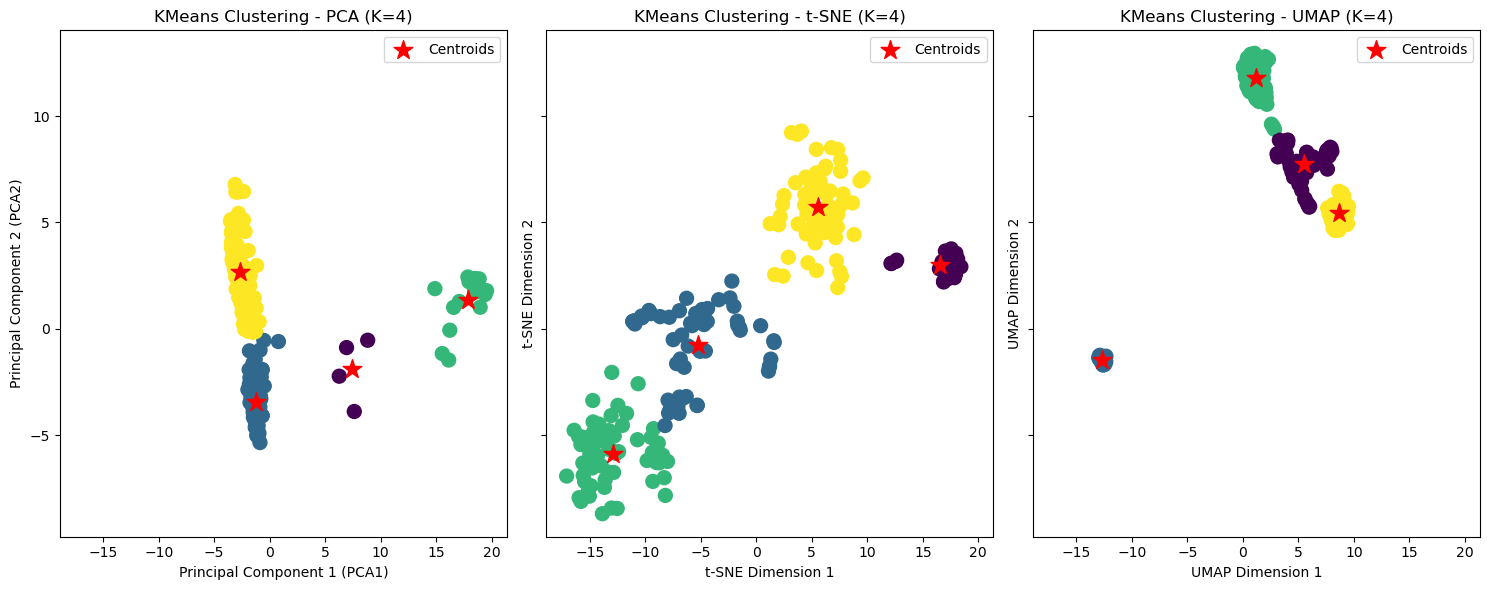

In [19]:
# Fit the AgglomerativeClustering model
n_clusters = 4
model_pca = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels = model_pca.fit_predict(pca_result)
centroids_pca = model_pca.cluster_centers_

# Perform KMeans clustering on t-SNE result
model_tsne = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_tsne = model_tsne.fit_predict(tsne_result)
centroids_tsne = model_tsne.cluster_centers_

# Perform KMeans clustering on UMAP result
model_umap = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels_umap = model_umap.fit_predict(umap_result)
centroids_umap = model_umap.cluster_centers_

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

# Visualize cluster assignments for PCA result
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=100)
axs[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[0].set_title(f'KMeans Clustering - PCA (K={n_clusters})')
axs[0].set_xlabel('Principal Component 1 (PCA1)')
axs[0].set_ylabel('Principal Component 2 (PCA2)')
axs[0].legend()

# Visualize cluster assignments for t-SNE result
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_tsne, cmap='viridis', s=100)
axs[1].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[1].set_title(f'KMeans Clustering - t-SNE (K={n_clusters})')
axs[1].set_xlabel('t-SNE Dimension 1')
axs[1].set_ylabel('t-SNE Dimension 2')
axs[1].legend()

# Visualize cluster assignments for UMAP result
axs[2].scatter(umap_result[:, 0], umap_result[:, 1], c=labels_umap, cmap='viridis', s=100)
axs[2].scatter(centroids_umap[:, 0], centroids_umap[:, 1], c='red', marker='*', s=200, label='Centroids')
axs[2].set_title(f'KMeans Clustering - UMAP (K={n_clusters})')
axs[2].set_xlabel('UMAP Dimension 1')
axs[2].set_ylabel('UMAP Dimension 2')
axs[2].legend()

plt.savefig("Clustering for reduced genes from 20.png", dpi=300, format="PNG")
plt.tight_layout()
plt.show()